# **Stock Prices Predictions with Machine Learning**

This Notebook will contain the modeling phases needed to predict stock prices using a deep learning model.
The stocks analyzed will be the following:
* IBM
* AAPL (Apple Inc.)
* AMZN (Amazon Inc.)
* GOOGL (Alphabet Inc.)


### Bollinger bands

Another interesting feature that can be computed from Adjusted Close are Bollinger bands.

In [199]:
from ta_utils.technical_indicators import bollinger_bands

IBM bollinger bands:

In [200]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_ibm[ub_column_name] = bollinger_bands(df_ibm['Adj Close'], window_size=mds)[1]
    df_ibm[lb_column_name] = bollinger_bands(df_ibm['Adj Close'], window_size=mds)[2]

In [201]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,1.831034,1.806507,1.787152,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [202]:
df_ibm.fillna(method='backfill', inplace=True)

In [203]:
df_ibm.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-02-18,120.500000,120.940002,119.699997,120.730003,120.730003,5398100,120.840816,120.225739,122.798580,122.801605,118.880026,125.884348,114.567129,129.172198,116.424963
2021-02-19,120.750000,120.760002,118.379997,118.989998,118.989998,6575500,120.797401,119.679540,122.717268,122.910881,118.683921,123.044776,116.314304,129.180605,116.253931
2021-02-22,118.500000,121.129997,118.440002,120.860001,120.860001,5877300,120.865001,119.870243,122.653422,122.934059,118.795943,123.033291,116.707195,129.125993,116.180851
2021-02-23,120.919998,121.349998,119.800003,120.709999,120.709999,4531300,120.738000,120.054926,122.565260,122.653059,118.822942,122.935035,117.174818,129.020870,116.109651
2021-02-24,120.800003,123.489998,120.519997,123.209999,123.209999,5818100,120.849001,120.171688,122.563217,123.195088,118.502913,123.364148,116.979228,129.017925,116.108508


In [204]:
df_ibm.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1962-01-02,7.713333,7.713333,7.626667,7.626667,1.858243,390000,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-03,7.626667,7.693333,7.626667,7.693333,1.874485,292500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-04,7.693333,7.693333,7.613333,7.616667,1.855805,262500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-05,7.606667,7.606667,7.453333,7.466667,1.819257,367500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568
1962-01-08,7.460000,7.460000,7.266667,7.326667,1.785148,547500,1.831034,1.806507,1.787152,1.885422,1.776646,1.878527,1.734487,1.854736,1.719568


In [205]:
start_date = '2020-01-1'
end_date = '2021-01-30'

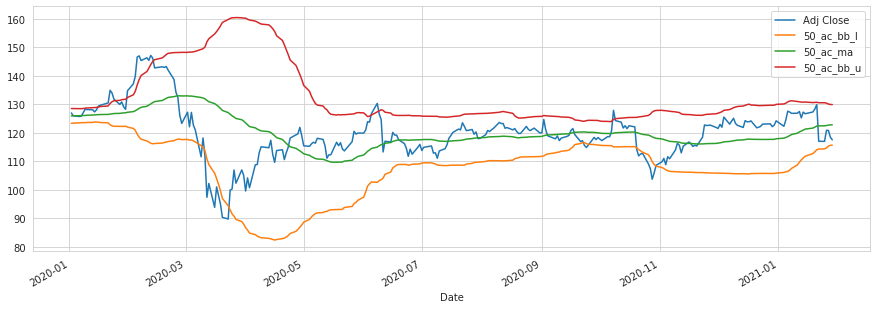

In [206]:
df_ibm[start_date:end_date][['Adj Close', '50_ac_bb_l', '50_ac_ma','50_ac_bb_u']].plot(legend=True,figsize=(15,5))

AMZN bollinger bands:

In [207]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_amzn[ub_column_name] = bollinger_bands(df_amzn['Adj Close'], window_size=mds)[1]
    df_amzn[lb_column_name] = bollinger_bands(df_amzn['Adj Close'], window_size=mds)[2]

In [208]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.597396,1.57474,1.772813,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [209]:
df_amzn.fillna(method='backfill', inplace=True)

In [210]:
df_amzn.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-02-18,3282.419922,3338.000000,3273.939941,3328.229980,3328.229980,3027400,3304.332959,3298.724475,3229.144775,3363.927436,3244.738482,3384.078129,3213.370821,3385.745319,3072.544232
2021-02-19,3328.229980,3333.500000,3245.750000,3249.899902,3249.899902,4297200,3296.222949,3295.869971,3230.982773,3361.491566,3230.954332,3383.838238,3207.901704,3386.327284,3075.638263
2021-02-22,3208.129883,3232.320068,3172.260010,3180.739990,3180.739990,3504600,3279.081958,3290.295471,3231.051772,3365.634028,3192.529888,3392.252777,3188.338165,3386.301978,3075.801567
2021-02-23,3127.030029,3204.729980,3093.600098,3194.500000,3194.500000,4669500,3266.237964,3285.320471,3232.857773,3361.541549,3170.934379,3395.865222,3174.775720,3384.134985,3081.580562
2021-02-24,3166.750000,3171.229980,3125.379883,3159.530029,3159.530029,3003000,3251.690967,3276.990479,3234.018574,3363.651628,3139.730306,3399.091150,3154.889808,3382.037003,3086.000145


In [211]:
df_amzn.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200,1.597396,1.57474,1.772813,1.93311,1.261682,1.836333,1.313146,2.458803,1.086822


In [212]:
start_date = '2020-01-1'
end_date = '2021-01-30'

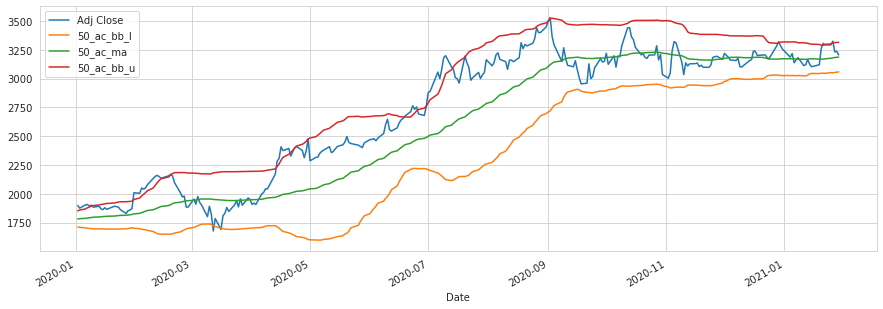

In [213]:
df_amzn[start_date:end_date][['Adj Close', '50_ac_bb_l', '50_ac_ma','50_ac_bb_u']].plot(legend=True,figsize=(15,5))

Apple bollinger bands:

In [214]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_aapl[ub_column_name] = bollinger_bands(df_aapl['Adj Close'], window_size=mds)[1]
    df_aapl[lb_column_name] = bollinger_bands(df_aapl['Adj Close'], window_size=mds)[2]

In [215]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,0.101975,0.108974,0.104248,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [216]:
df_aapl.fillna(method='backfill', inplace=True)

In [217]:
df_aapl.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-02-18,129.199997,130.000000,127.410004,129.710007,129.710007,96648100,134.649500,136.032081,131.576925,139.821352,129.477647,143.199620,128.864541,142.007567,121.146283
2021-02-19,130.240005,130.710007,128.800003,129.869995,129.869995,87525900,133.917999,135.692292,131.703018,139.545200,128.290798,143.360206,128.024378,141.887890,121.518145
2021-02-22,128.009995,129.720001,125.599998,126.000000,126.000000,103607600,132.842000,135.049167,131.739129,139.969011,125.714989,143.693038,126.405296,141.827686,121.650572
2021-02-23,123.760002,126.709999,118.389999,125.860001,125.860001,157859100,131.737000,134.206829,131.824364,139.462184,124.011815,142.990963,125.422695,141.631303,122.017424
2021-02-24,124.940002,125.559998,122.230003,125.349998,125.349998,110691500,130.671000,133.327009,131.870241,138.711130,122.630870,141.948849,124.705169,141.530117,122.210365


In [218]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100922,469033600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095657,175884800,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088636,105728000,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090830,86441600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.093463,73449600,0.101975,0.108974,0.104248,0.124365,0.079585,0.132002,0.085946,0.126685,0.081811


In [219]:
start_date = '2020-01-1'
end_date = '2021-01-30'

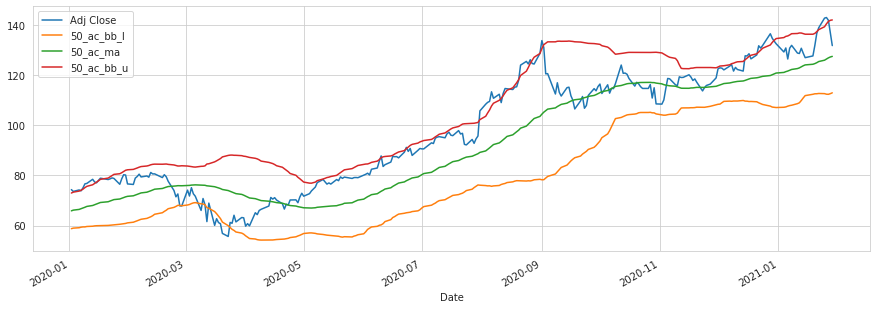

In [220]:
df_aapl[start_date:end_date][['Adj Close', '50_ac_bb_l', '50_ac_ma','50_ac_bb_u']].plot(legend=True,figsize=(15,5))

Alphabet Inc. bollinger bands:

In [221]:
# bollinger bands window sizes in days
ma_d_sz = [10,20,50]

# adding moving average columns to dataframe
for mds in ma_d_sz:
    ub_column_name = "%s_ac_bb_u" %(str(mds))
    lb_column_name = "%s_ac_bb_l" %(str(mds))
    df_googl[ub_column_name] = bollinger_bands(df_googl['Adj Close'], window_size=mds)[1]
    df_googl[lb_column_name] = bollinger_bands(df_googl['Adj Close'], window_size=mds)[2]

In [222]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.432933,52.692943,63.586987,NaN,NaN,NaN,NaN,NaN,NaN


Moving average feature is empty for the first *n* days, where *n* is the window size, so I'll use some backfill to fill NaN values

In [223]:
df_googl.fillna(method='backfill', inplace=True)

In [224]:
df_googl.tail()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2021-02-18,2105.000000,2121.989990,2093.330078,2105.810059,2105.810059,1127300,2090.776001,1992.863489,1852.125195,2127.885024,2053.666978,2215.137461,1770.589516,2127.626424,1576.623967
2021-02-19,2107.790039,2118.580078,2083.429932,2088.810059,2088.810059,1866100,2094.294019,2003.096490,1857.560796,2120.949812,2067.638226,2223.129983,1783.062998,2140.850093,1574.271498
2021-02-22,2053.600098,2080.330078,2048.000000,2054.260010,2054.260010,1469500,2090.837012,2011.181488,1862.419397,2127.667275,2054.006748,2225.933273,1796.429703,2150.760197,1574.078597
2021-02-23,2013.989990,2072.500000,1990.229980,2060.120117,2060.120117,1732200,2088.397021,2019.473492,1868.064600,2130.009741,2046.784302,2227.934498,1811.012487,2160.668947,1575.460252
2021-02-24,2030.040039,2088.320068,2027.530029,2083.810059,2083.810059,1129300,2089.239038,2028.266498,1874.387800,2130.014337,2048.463739,2231.695684,1824.837312,2171.760767,1577.014833


In [225]:
df_googl.head()

,Open,High,Low,Close,Adj Close,Volume,10_ac_ma,20_ac_ma,50_ac_ma,10_ac_bb_u,10_ac_bb_l,20_ac_bb_u,20_ac_bb_l,50_ac_bb_u,50_ac_bb_l
Date,,,,,,,,,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.432933,52.692943,63.586987,55.781053,49.084813,56.933168,48.452718,88.331593,38.842381


In [226]:
start_date = '2020-01-1'
end_date = '2021-01-30'

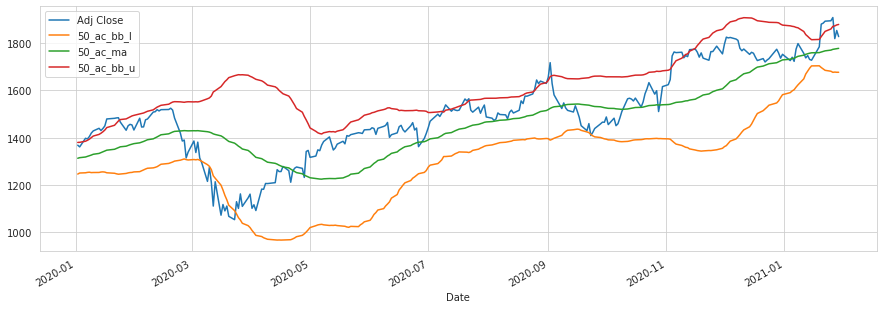

In [227]:
df_googl[start_date:end_date][['Adj Close', '50_ac_bb_l', '50_ac_ma','50_ac_bb_u']].plot(legend=True,figsize=(15,5))

### Hyperparameters Tuning

DeepAR is the model of choice of this project.
This model expects input data to be already test-train splitted.
A big part of the model design has to be done looking close at data.
More specifically, defining these two hyperparameters about the data:
* Context length
* Prediction length

### Prediction length

This is the length of the time series future predictions in days. It will be conveniently set to 5 days (exactly a week of trading hours) because a shorter interval would be of little significance.
A longer interval could be interesting from an application point of view, but it can be challenging in terms of model performances.

### Context length

Context length can be either:
* designed on patterns or seasonality observed in the data, if any is present;
* chosen as a fixed value. This will be my choice, and it will be the same as the moving average window, in order to have a good reference metrics, applicable to both this model and the benchmark model.

To explore this second option, we will refer to what we've found during the EDA stage.

In [237]:
covariate_columns = list(df_ibm.columns)
covariate_columns.remove('Close')
covariate_columns.remove('Adj Close')

In [ ]:
from source_deepar import deepar_utils
#Define parameters
context_length = [10, 20, 50]
prediction_length = [5, 10, 25]    

# setting target columns
target_column = 'Adj Close'

# retrieving covariate columns
covariate_columns = list(df_ibm.columns)
covariate_columns.remove('Close')
covariate_columns.remove('Adj Close')

train_test_split = 0.9
num_test_windows = 4
    
    
hyperparameters = {
    "prediction_length": str(prediction_length), #number of time-steps model is trained to predict, always generates forecasts with this length
    "context_length": str(context_length), #number of time-points that the model gets to see before making the prediction, should be about same as the prediction_length
    "time_freq": interval, #granularity of the time series in the dataset
    "epochs": "200", #maximum number of passes over the training data
    "early_stopping_patience": "40", #training stops when no progress is made within the specified number of epochs
    "num_layers": "2", #number of hidden layers in the RNN, typically range from 1 to 4    
    "num_cells": "40", #number of cells to use in each hidden layer of the RNN, typically range from 30 to 100
    "mini_batch_size": "128", #size of mini-batches used during training, typically values range from 32 to 512
    "learning_rate": "1e-3", #learning rate used in training. Typical values range from 1e-4 to 1e-1
    "dropout_rate": "0.1", # dropout rate to use for regularization, typically less than 0.2. 
    "likelihood": "gaussian" #noise model used for uncertainty estimates - gaussian/beta/negative-binomial/student-T/deterministic-L1
}